In [1]:
# keep this function handy for all network visualizations in all chapters

def draw_graph(G, show_names=False, node_size=1, font_size=10, edge_width=0.5): 

    import numpy as np 
    
    from IPython.display import SVG 
    from sknetwork.visualization import svg_graph 
    from sknetwork.data import Bunch 
    from sknetwork.ranking import PageRank 

    adjacency = nx.to_scipy_sparse_matrix(G, nodelist=None, dtype=None, weight='weight', format='csr') 

    names = np.array(list(G.nodes())) 

    graph = Bunch() 
    graph.adjacency = adjacency 
    graph.names = np.array(names) 

    pagerank = PageRank() 

    scores = pagerank.fit_transform(adjacency) 

    if show_names: 
        
        image = svg_graph(graph.adjacency, font_size=font_size, node_size=node_size, names=graph.names, width=700, height=500, scores=scores, edge_width=edge_width) 

    else: 

        image = svg_graph(graph.adjacency, node_size=node_size, width=700, height=500, scores = scores, edge_width=edge_width) 

    return SVG(image) 

# Newspaper3k

In [2]:
import newspaper 

domain = 'https://www.goodnewsnetwork.org' 

paper = newspaper.build(domain, memoize_articles=False) 

urls = paper.article_urls() 

In [3]:
urls

['https://www.goodnewsnetwork.org/category/news/',
 'https://www.goodnewsnetwork.org/category/news/horoscopes/',
 'https://www.goodnewsnetwork.org/category/news/usa/',
 'https://www.goodnewsnetwork.org/category/news/world/',
 'https://www.goodnewsnetwork.org/category/news/inspiring/',
 'https://www.goodnewsnetwork.org/category/news/animals/',
 'https://www.goodnewsnetwork.org/category/news/laughs/',
 'https://www.goodnewsnetwork.org/category/news/earth/',
 'https://www.goodnewsnetwork.org/category/news/heroes/',
 'https://www.goodnewsnetwork.org/category/news/kids/',
 'https://www.goodnewsnetwork.org/category/news/self-help/',
 'https://www.goodnewsnetwork.org/category/news/founders-blog/',
 'https://www.goodnewsnetwork.org/category/news/science/',
 'https://www.goodnewsnetwork.org/category/news/health/',
 'https://www.goodnewsnetwork.org/category/news/arts-leisure/',
 'https://www.goodnewsnetwork.org/category/news/celebrities/',
 'https://www.goodnewsnetwork.org/category/news/sports/'

In [4]:
urls = sorted([u for u in urls if 'category' not in u and len(u)>60]) 

In [5]:
urls[0:10]

['https://www.goodnewsnetwork.org/6-memory-bears-sewn-with-love-and-grandpas-flannels-for-widows-grandchildren/',
 'https://www.goodnewsnetwork.org/birth-of-a-critically-endangered-przewalskis-horse-in-san-diego/',
 'https://www.goodnewsnetwork.org/enorme-en-anidacion-de-tortugasen-tailandia-y-florida/',
 'https://www.goodnewsnetwork.org/florida-toddler-is-best-friends-with-a-white-tree-frog/',
 'https://www.goodnewsnetwork.org/formation-that-looks-like-grizzly-bear-spotted-on-mars-by-nasa/',
 'https://www.goodnewsnetwork.org/gopatch-drug-free-patches-good-gifts/',
 'https://www.goodnewsnetwork.org/healthy-lifestyle-especially-nutritious-diet-seems-to-slow-memory-decline-in-older-chinese/',
 'https://www.goodnewsnetwork.org/horoscope-from-rob-brezsnys-free-will-astrology-1-28-2023/',
 'https://www.goodnewsnetwork.org/huge-meteorite-found-in-antarctica-one-of-the-biggest-ever-recovered/',
 'https://www.goodnewsnetwork.org/livin-good-currency-ep-25-gene-gurkoff-on-making-charity-as-easy-

In [6]:
from newspaper import Article 

url = urls[5] 

article = Article(url) 
article.download() 
article.parse() 
article.nlp() 

In [7]:
title = article.title 

title 

'Holistic Patches Relieve Anxiety – Without Drugs'

In [8]:
text = article.text 

text[0:500] 

'Description\n\nGoPatch developed “the world’s first homeopathic patch” that can provide relief from the debilitating symptoms of anxiety.\n\nSimply place this discreet, round patch over your navel to stimulate your body’s natural healing response. (Get more details, and read personal testimonials, in the GNN article here.)\n\nThe drug-free products, which have no known side effects, are safe for kids over 4-years-old. The patches are safe while taking other medications and guaranteed to work — or your'

In [9]:
summary = article.summary 

summary 

'DescriptionGoPatch developed “the world’s first homeopathic patch” that can provide relief from the debilitating symptoms of anxiety.\nSimply place this discreet, round patch over your navel to stimulate your body’s natural healing response.\nThe patches are safe while taking other medications and guaranteed to work — or your money back.\nThey have a product for menstrual cramps, offering relief from period cramps, menstrual discomfort, and PMS—fast, or your money back.\nBut 15 minutes later, I realized how the patch worked, and it worked fast.'

In [10]:
language = article.meta_lang 

language 

'en'

In [11]:
keywords = article.keywords 

keywords 

['pain',
 'patch',
 'drugs',
 'vertigo',
 'menstrual',
 'cramps',
 'worked',
 'relieve',
 'gopatch',
 'product',
 'holistic',
 'anxiety',
 'work',
 'relief',
 'patches']

In [12]:
image = article.meta_img 

image 

'https://www.goodnewsnetwork.org/wp-content/uploads/2022/02/Anxious-patch-GoPatch-submitted.jpg'

In [13]:
from newspaper import Config 

config = Config() 
config.browser_user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 12.0; rv:95.0) Gecko/20100101 Firefox/95.0' 
config.request_timeout = 3 

In [14]:
import time 

time.sleep(1)

In [15]:
import spacy

nlp = spacy.load("en_core_web_md")

def extract_entities(text): 

    doc = nlp(text) 

    sentences = list(doc.sents) 

    entities = [] 

    for sentence in sentences: 

        sentence_entities = [] 

        sent_doc = nlp(sentence.text) 

         

        for ent in sent_doc.ents: 

            if ent.label_ in ['PERSON', 'ORG', 'GPE']: 

                entity = ent.text.strip() 

                if "'s" in entity: 

                    cutoff = entity.index("'s") 

                    entity = entity[:cutoff] 

                if entity != '': 

                    sentence_entities.append(entity)   

        sentence_entities = list(set(sentence_entities))       

        if len(sentence_entities) > 1: 

            entities.append(sentence_entities) 

    return entities 

In [16]:
entities = extract_entities(text) 

entities 

[['Good3', '• Use', 'GoPatch'],
 ['Heather Gallagher', 'GoPatch'],
 ['Health First Pharmacy', 'California', 'Windsor'],
 ['GNN', 'California']]

In [17]:
import pandas as pd

def get_network_data(entities): 

    final_sources = [] 
    final_targets = [] 

    for row in entities: 

        source = row[0] 
        targets = row[1:] 

        for target in targets: 

            final_sources.append(source) 
            final_targets.append(target)   

    df = pd.DataFrame({'source':final_sources, 'target':final_targets}) 

    return df 

In [18]:
network_df = get_network_data(entities) 

network_df.head() 

,source,target
0,Good3,• Use
1,Good3,GoPatch
2,Heather Gallagher,GoPatch
3,Health First Pharmacy,California
4,Health First Pharmacy,Windsor


In [19]:
import newspaper 
from newspaper import Article 
from tqdm import tqdm 

def get_story_df(domain): 

    paper = newspaper.build(domain, memoize_articles=False) 

    urls = paper.article_urls() 

    urls = sorted([u for u in urls if 'category' not in u and len(u)>60]) 

    titles = [] 
    texts = [] 
    languages = [] 
    keywords = [] 

    for url in tqdm(urls): 

        article = Article(url) 
        article.download() 
        article.parse() 
        article.nlp() 
        
        titles.append(article.title) 
        texts.append(article.text) 
        languages.append(article.meta_lang) 
        keywords.append(article.keywords) 

    df = pd.DataFrame({'urls':urls, 'title':titles, 'text':texts, 'lang':languages, 'keywords':keywords}) 

    return df 

In [20]:
domain = 'https://www.goodnewsnetwork.org' 

df = get_story_df(domain) 

df.head() 

100%|██████████████████████████████████████████████████████████████████████████████████| 22/22 [00:15<00:00,  1.42it/s]


,urls,title,text,lang,keywords
0,https://www.goodnewsnetwork.org/6-memory-bears...,6 ‘Memory Bears’ Sewn With Love and Grandpa’s ...,A hospice care volunteer who sews together ted...,en,"[volunteer, flannels, mary, guitar, grandkids,..."
1,https://www.goodnewsnetwork.org/birth-of-a-cri...,U.S. Zoo Celebrates Birth of Extremely Rare Pr...,The San Diego Zoo Safari Park announced the bi...,en,"[extinct, foal, celebrates, przewalskis, wildl..."
2,https://www.goodnewsnetwork.org/enorme-en-anid...,Las Playas han Visto un Incremento Enorme en A...,Desde peces volviendo a los canales de Venecia...,es,"[turistas, las, restricciones, el, tailandia, ..."
3,https://www.goodnewsnetwork.org/florida-toddle...,Toddler is Best Friends With a Frog: They Eat ...,Meet the toddler whose best friend is a pet fr...,en,"[shes, best, white, sits, frog, watch, toddler..."
4,https://www.goodnewsnetwork.org/formation-that...,A Formation That Looks Like a Grizzly Bear Spo...,Fiction and non-fiction writers alike have ima...,en,"[planetthe, spotted, pattern, formation, grizz..."


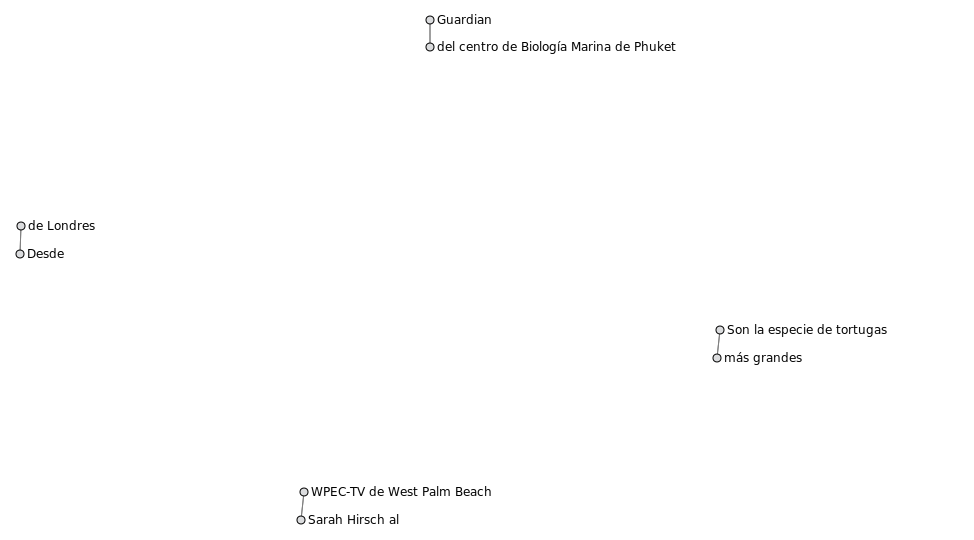

In [26]:
import networkx as nx

text = df['text'][2] # change this number if story is mangled and get an error

entities = extract_entities(text) 

network_df = get_network_data(entities) 

G = nx.from_pandas_edgelist(network_df) 

draw_graph(G, show_names=True, node_size=4, edge_width=1, font_size=12) 

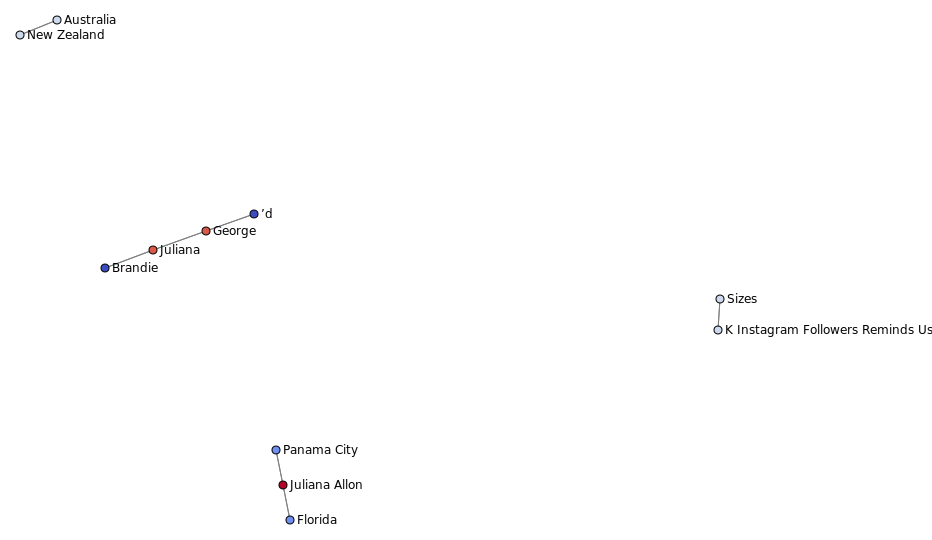

In [27]:
text = df['text'][3] 

entities = extract_entities(text) 

network_df = get_network_data(entities) 

G = nx.from_pandas_edgelist(network_df) 

draw_graph(G, show_names=True, node_size=4, edge_width=1, font_size=12) 

# Twitter

You are going to have to add your bearer token for authentication, so please follow along with the book. 